# Import CSV

In [834]:
import unicodecsv

with open('titanic_data.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    titanic_data = list(reader)
    
print(titanic_data[0])

OrderedDict([('PassengerId', '1'), ('Survived', '0'), ('Pclass', '3'), ('Name', 'Braund, Mr. Owen Harris'), ('Sex', 'male'), ('Age', '22'), ('SibSp', '1'), ('Parch', '0'), ('Ticket', 'A/5 21171'), ('Fare', '7.25'), ('Cabin', ''), ('Embarked', 'S')])


# Clean Data

## Get Dictionary Keys

In [835]:
for dict in titanic_data:
    for key, value in dict.items():
        print(key)
    break

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


## Fix Data Types

In [836]:
# Convert several columns of string data to integers and decimals where appropriate

# Function to convert an integer from string type to integer type
def parse_maybe_int(i):
    if i == None:
        return None
    elif i == '':
        return None
    else:
        return int(i)

# Function to convert a decimal number from string type to float
def parse_maybe_float(i):
    if i == None:
        return None
    elif i == '':
        return None
    else:
        return float(i)
    
for dict in titanic_data:
    dict['PassengerId'] = parse_maybe_int(dict['PassengerId'])
    dict['Survived'] = parse_maybe_int(dict['Survived'])
    dict['Pclass'] = parse_maybe_int(dict['Pclass'])
    dict['Age'] = parse_maybe_float(dict['Age'])
    dict['SibSp'] = parse_maybe_int(dict['SibSp'])
    dict['Parch'] = parse_maybe_int(dict['Parch'])
    dict['Fare'] = float((dict['Fare']))

print(titanic_data[0])

OrderedDict([('PassengerId', 1), ('Survived', 0), ('Pclass', 3), ('Name', 'Braund, Mr. Owen Harris'), ('Sex', 'male'), ('Age', 22.0), ('SibSp', 1), ('Parch', 0), ('Ticket', 'A/5 21171'), ('Fare', 7.25), ('Cabin', ''), ('Embarked', 'S')])


# Investigate Data

In [837]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

## 1.   Calculate Overall Survival Rate

In [838]:
titanic_df = pd.DataFrame(titanic_data)
num_passengers = len(titanic_df)
num_deaths = len(titanic_df[titanic_df["Survived"] == 0])
num_survived = len(titanic_df[titanic_df["Survived"] == 1])

print("Number of deaths: {}\nNumber survived: {}\nTotal: {}".format(num_deaths, num_survived, num_passengers))
print("Overall survival rate: {:.0%}".format(num_survived/num_passengers))

# Check numbers using a for-loop to sum up each category
deaths, survived, passengers = 0, 0, 0
for dict in titanic_data:
    if dict["Survived"] == 0:
        deaths += 1
    else:
        survived += 1
    passengers += 1
    
print("\nCheck numbers:", deaths, survivals, passengers)

Number of deaths: 549
Number survived: 342
Total: 891
Overall survival rate: 38%

Check numbers: 549 342 891


Now let's dive in to each variable and see how it correlates to survival:

## 2.   Differences in Socioeconomic Status

### Assume ticket type (first, second, third) as indicator of socioeconomic status (upper, middle, lower)

Number of passengers aboard (upper, middle, lower):
216 184 491
Percentage of total (upper, middle, lower):
24%, 21%, 55%



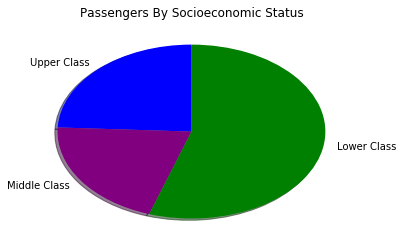

In [839]:
# Calculations
upper_class_total, middle_class_total, lower_class_total = 0, 0, 0
upper_class_survived, middle_class_survived, lower_class_survived = 0, 0, 0

for dict in titanic_data:
    if dict['Pclass'] == 1:
        upper_class_total += 1
        if dict["Survived"] == 1:
            upper_class_survived += 1
    elif dict['Pclass'] == 2:
        middle_class_total += 1
        if dict["Survived"] == 1:
            middle_class_survived += 1
    else:
        lower_class_total += 1
        if dict["Survived"] == 1:
            lower_class_survived += 1

# Number of passengers aboard by socioeconomic status
print("Number of passengers aboard (upper, middle, lower):")
print(upper_class_total, middle_class_total, lower_class_total)
print("Percentage of total (upper, middle, lower):")
print("{:.0%}, {:.0%}, {:.0%}"\
      .format(upper_class_total/num_passengers, middle_class_total/num_passengers, lower_class_total/num_passengers,))

# Pie Chart
passengers_by_ses = upper_class_total/num_passengers, middle_class_total/num_passengers, lower_class_total/num_passengers
plt.pie(passengers_by_ses, labels=['Upper Class', 'Middle Class', 'Lower Class'],shadow=True, startangle=90, colors = ['blue', 'purple', 'green'])
plt.title('Passengers By Socioeconomic Status')
print()

Number of surviving passengers (upper, middle, lower):
136 87 119
Survival rate for each class (upper, middle, lower):
63%, 47%, 24%



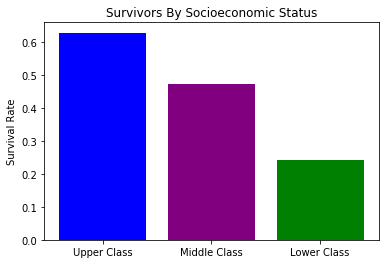

In [840]:
# Number of survivors by socioeconomic status
print("Number of surviving passengers (upper, middle, lower):")
print(upper_class_survived, middle_class_survived, lower_class_survived)
print("Survival rate for each class (upper, middle, lower):")
print("{:.0%}, {:.0%}, {:.0%}"\
      .format(upper_class_survived/upper_class_total, middle_class_survived/middle_class_total, lower_class_survived/lower_class_total))

# Bar Chart
survivors_by_ses = upper_class_survived/upper_class_total, middle_class_survived/middle_class_total, lower_class_survived/lower_class_total
plt.bar(['Upper Class', 'Middle Class', 'Lower Class'], survivors_by_ses, color = ['blue', 'purple', 'green'])
plt.title('Survivors By Socioeconomic Status')
plt.ylabel('Survival Rate')
print()

The bar graph shows an obvious difference between the percentage of passengers in each class who survived.
<br>This makes intuitive sense because the lower and middle classes had cabins located on lower levels of the ship.

The pie chart shows that there are many more passengers with a third class ticket (lower class)
<br>than those with a first and second class ticket combined (upper and middle class).

## Fare by Ticket Class (to check assumption about socioeconomic status divisions)


This scatter plot shows that the fare price for middle and lower class tickets were actually of a similar range.
It is interesting to see the large variation in fare prices for first class tickets.


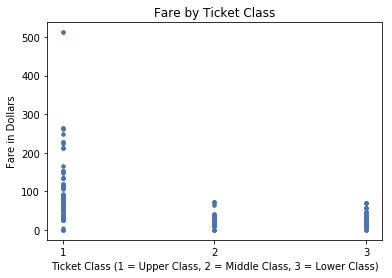

In [841]:
plt.scatter(titanic_df['Pclass'], titanic_df['Fare'], s= 10)
plt.xticks(np.arange(1, 4, 1)) # x-axis tick customization: lower-bound = 1, upper-bound (exclusive) = 4, step = 1
plt.title("Fare by Ticket Class")
plt.xlabel('Ticket Class (1 = Upper Class, 2 = Middle Class, 3 = Lower Class)')
plt.ylabel('Fare in Dollars')
print()
print("This scatter plot shows that the fare price for middle and lower class tickets were actually of a similar range.\
\nIt is interesting to see the large variation in fare prices for first class tickets.")

This reveals a limitation to the upper, middle, and lower class divisions that were assumed beforehand.
<br>The ticket type may not be a good indication of socioeconomic status. Next, we will try using fare as the socioeconomic indicator instead.

## Survival by Fare


This histogram shows a low proportion of survivors for those who paid a fare less than $50.
This may be a better indicator of survival by socioeconomic status than ticket type.


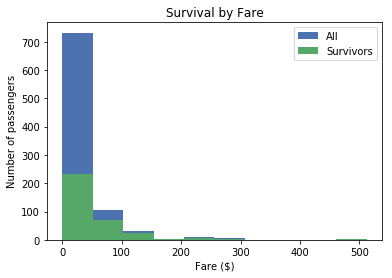

In [842]:
# Plot a histogram of all passengers by fare amount and overlay another historgram of survivors by fare amount
fares = titanic_df["Fare"]
fares_survived = titanic_df[titanic_df["Survived"] == 1]["Fare"]
plt.hist(fares)
plt.hist(fares_survived)
plt.title("Survival by Fare")
plt.xlabel("Fare ($)")
plt.ylabel("Number of passengers")
plt.legend(['All', 'Survivors'])
print()
print("This histogram shows a low proportion of survivors for those who paid a fare less than $50.\
\nThis may be a better indicator of survival by socioeconomic status than ticket type.")

Previously, we assumed that the reason for less survivals for passengers with lower socioeconomic status was because they had cabins in the lower floors of the ship. Next, let's check this assumption.

## Survival by Cabin

In [843]:
survival_by_cabin = titanic_df[titanic_df['Cabin']!=""][['Survived', 'Cabin', 'Pclass', 'Fare']]
print("We have {} passengers that have their cabin location recorded.".format(len(survival_by_cabin)))
print("Note that this may be too small of a subset of the original {} to draw conclusions from.".format(num_passengers))

We have 204 passengers that have their cabin location recorded.
Note that this may be too small of a subset of the original 891 to draw conclusions from.


In [844]:
print("Let's first take a look at the data to see how it is structured.")
print(survival_by_cabin)

Let's first take a look at the data to see how it is structured.
     Survived        Cabin  Pclass      Fare
1           1          C85       1   71.2833
3           1         C123       1   53.1000
6           0          E46       1   51.8625
10          1           G6       3   16.7000
11          1         C103       1   26.5500
21          1          D56       2   13.0000
23          1           A6       1   35.5000
27          0  C23 C25 C27       1  263.0000
31          1          B78       1  146.5208
52          1          D33       1   76.7292
54          0          B30       1   61.9792
55          1          C52       1   35.5000
61          1          B28       1   80.0000
62          0          C83       1   83.4750
66          1          F33       2   10.5000
75          0        F G73       3    7.6500
88          1  C23 C25 C27       1  263.0000
92          0          E31       1   61.1750
96          0           A5       1   34.6542
97          1      D10 D12       1 

From a quick glance, there are records that have multiple cabins listed under one passenger.
<br>What is the maximum number of cabins one passenger can have? Does it explain the larger fares that we were previously surprised about?
<br>Let's print out the records that have mutiple cabins under one passenger:

Passenger 27 has C23 C25 C27 cabins with a class 1 ticket and paid $263.0 for fare
Passenger 75 has F G73 cabins with a class 3 ticket and paid $7.65 for fare
Passenger 88 has C23 C25 C27 cabins with a class 1 ticket and paid $263.0 for fare
Passenger 97 has D10 D12 cabins with a class 1 ticket and paid $63.3583 for fare
Passenger 118 has B58 B60 cabins with a class 1 ticket and paid $247.5208 for fare
Passenger 128 has F E69 cabins with a class 3 ticket and paid $22.3583 for fare
Passenger 297 has C22 C26 cabins with a class 1 ticket and paid $151.55 for fare
Passenger 299 has B58 B60 cabins with a class 1 ticket and paid $247.5208 for fare
Passenger 305 has C22 C26 cabins with a class 1 ticket and paid $151.55 for fare
Passenger 311 has B57 B59 B63 B66 cabins with a class 1 ticket and paid $262.375 for fare
Passenger 341 has C23 C25 C27 cabins with a class 1 ticket and paid $263.0 for fare
Passenger 390 has B96 B98 cabins with a class 1 ticket and paid $120.0 for fare
Passenger 435 h

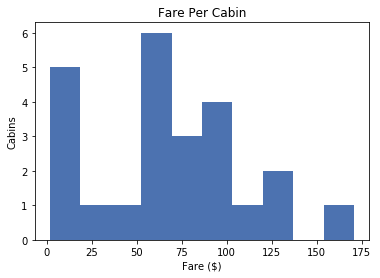

In [845]:
max_cabins = 0
fare_per_cabin = []
for passengerid, row in survival_by_cabin.iterrows():
    cabins = row['Cabin'].split(' ')
    num_cabins = len(cabins)
    if num_cabins > 1:
        print("Passenger {} has {} cabins with a class {} ticket and paid ${} for fare".format(passengerid, row['Cabin'], row['Pclass'], row['Fare']))
        fare_per_cabin.append(row['Fare']/num_cabins)
    if num_cabins > max_cabins:
        max_cabins = num_cabins
print("Max number cabins =", max_cabins)
print()
print("It seems like some a combination of F and G cabins always costed $7.65 and were 3rd class tickets.")
print("Besides those passengers, the rest with multiple cabins all had 1st class tickets.")
print("Their cabins all start with the same letter (either B, C, or D).")
print("Let's see how much each cabin costed:")
fare_per_cabin.sort()
plt.hist(fare_per_cabin)
plt.title("Fare Per Cabin")
plt.xlabel("Fare ($)")
plt.ylabel("Cabins")
print()

It seems like there is still no pattern to the amount of fare paid per cabin.
<br>Next, let's plot the cabin level for all passengers and then for all survivors,
assuming that the first letter of each cabin (B, C, D, E, F, G) stands for the ship level.

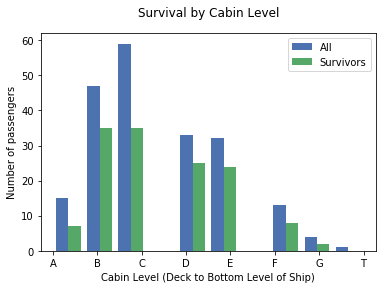

In [846]:
# Next, plot histogram of cabin level for all and for survivors

survival_by_cabin['Cabin_level'] = survival_by_cabin['Cabin'].str[0]

# Sort by Cabin_level first for better plot visualization
survival_by_cabin = survival_by_cabin.sort_values(by=['Cabin_level'])
cabin_levels_all = list(survival_by_cabin['Cabin_level'])
cabin_levels_survived = list(survival_by_cabin[survival_by_cabin['Survived'] == 1]['Cabin_level'])

# Plot histgrams
plt.style.use('seaborn-deep')
fig = plt.figure() 
ax = fig.add_subplot(111)
ax.hist([cabin_levels_all, cabin_levels_survived], label=("All", "Survivors"))
ax.legend()
plt.title("Survival by Cabin Level", y = 1.05)
plt.xlabel("Cabin Level (Deck to Bottom Level of Ship)")
plt.ylabel("Number of passengers")
print()

There does not seem to be a significantly lesser proportion of survivors from lower decks, at least from these records. 
<br>(Recall from the beginning when we noted the limitation that only 204 records out of 891 had cabin location(s) specified.)

Next, let's move on to analyze another variable on survival — gender:

## 3.   Survival by Gender (Male vs. Female)

Number of males and females:
577 314
65% 35%

About two thirds of passengers on the Titanic were male and about one third were female.


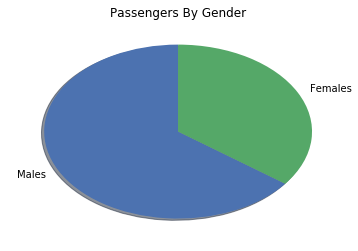

In [847]:
num_males, num_females = 0, 0
num_surviving_males, num_surviving_females = 0, 0
for dict in titanic_data:
    if dict['Sex'] == 'male':
        num_males += 1
        if dict["Survived"] == 1:
            num_surviving_males += 1
    else:
        num_females +=1
        if dict["Survived"] == 1:
            num_surviving_females += 1
print("Number of males and females:")
print(num_males, num_females)
print("{:.0%} {:.0%}".format(num_males/num_passengers, num_females/num_passengers))

# Pie Chart
plt.pie([num_males, num_females], labels=['Males', 'Females'],shadow=True, startangle=90)
plt.title('Passengers By Gender')
print()
print("About two thirds of passengers on the Titanic were male and about one third were female.")

Number of surviving males and females:
109 233
19% 74%

The bar graph shows a large difference between the percentage of males vs. females who survived.
This makes intuitive sense because females were prioritized during the evacuation on to lifeboats.


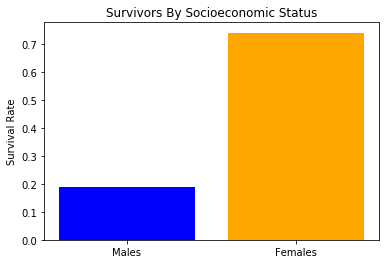

In [848]:
print("Number of surviving males and females:")
print(num_surviving_males, num_surviving_females)
print("{:.0%} {:.0%}".format(num_surviving_males/num_males, num_surviving_females/num_females))

# Bar Chart
survivors_by_gender = num_surviving_males/num_males, num_surviving_females/num_females
plt.bar(['Males', 'Females'], survivors_by_gender, color = ['blue','orange'])
plt.title('Survivors By Socioeconomic Status')
plt.ylabel('Survival Rate')
print()
print("The bar graph shows a large difference between the percentage of males vs. females who survived.\
\nThis makes intuitive sense because females were prioritized during the evacuation on to lifeboats.")

## 4.   Survival By Age


This histogram shows an even distribution of survivors to passengers across the ages.

One can see a larger portion of survivors around a child's age and a smaller proportion of survivors for adults.
This makes intuitive sense because children were prioritized over adults during the evacuation.


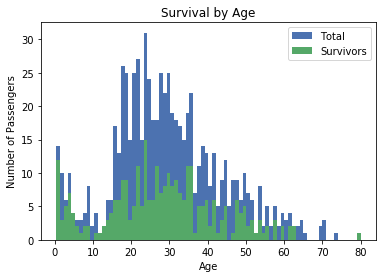

In [849]:
age_list = list(titanic_df['Age'].dropna()) # Remove NaN values too
survival_by_age = list(titanic_df[titanic_df['Survived'] == 1]['Age'].dropna()) # Remove NaN values too

plt.hist(age_list, bins = 80)
plt.hist(survival_by_age, bins = 80)
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title("Survival by Age")
plt.legend(['Total', 'Survivors'])
print()
print("This histogram shows an even distribution of survivors to passengers across the ages.")
print()
print("One can see a larger portion of survivors around a child's age and a smaller proportion of survivors for adults.\
\nThis makes intuitive sense because children were prioritized over adults during the evacuation.")

#### Use collections library for higher granularity in histogram


This histogram is more granular and shows that pretty much all infants abroad survived.


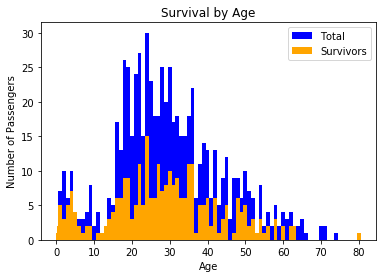

In [850]:
# Same thing but using collections for higher granularity
import collections

freq_age_dict = collections.Counter(age_list)
freq_survived_dict = collections.Counter(survival_by_age)

labels, values = zip(*freq_age_dict.items())
indexes = labels
width = 1
plt.bar(indexes, values, width, color = 'blue')

labels, values = zip(*freq_survived_dict.items())
indexes = labels
width = 1
plt.bar(indexes, values, width, color = 'orange')

plt.title("Survival by Age")
plt.legend(['Total', 'Survivors'])
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
print()
print("This histogram is more granular and shows that pretty much all infants abroad survived.")

## Survival by Age Category


This histogram confirms the above speculation that a higher proportion of infants and children survived
compared to adults.


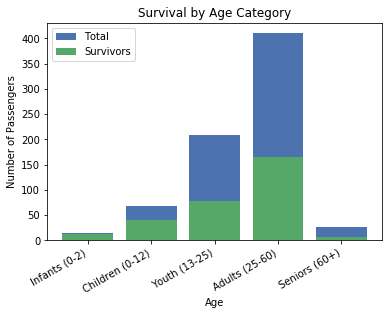

In [851]:
# Categorize by age
def categorize_by_age(age_list):
    age, num_children, num_infants, num_youth, num_adults, num_seniors = 0, 0, 0, 0, 0, 0
    for i in range(len(age_list)):
        age = age_list[i]
        if age < 13:
            num_children += 1
            if age < 2:
                num_infants += 1
        elif age < 25:
            num_youth += 1
        elif age < 60:
            num_adults += 1
        else:
            num_seniors += 1
    return [num_infants, num_children, num_youth, num_adults, num_seniors]

age_category_counts = categorize_by_age(age_list)
age_category_survivals = categorize_by_age(survival_by_age)
age_category_labels = ['Infants (0-2)', 'Children (0-12)', 'Youth (13-25)', 'Adults (25-60)', 'Seniors (60+)']

plt.bar(age_category_labels, age_category_counts)
plt.bar(age_category_labels, age_category_survivals)
plt.xticks(age_category_labels, rotation=30, horizontalalignment='right')
plt.title("Survival by Age Category")
plt.legend(['Total', 'Survivors'])
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
print()
print("This histogram confirms the above speculation that a higher proportion of infants and children survived\
\ncompared to adults.")

## 5.   Survival by Number of Family Members Aboard

### Number of Passengers with and without family aboard

Number of passengers with siblings or spouses: 283 (32%)
Number of passengers with parents or children: 213 (24%)

Number of passengers with family (siblings, spouses, parents, or children): 354 (40%)
Number of passengers with no family: 537 (60%)



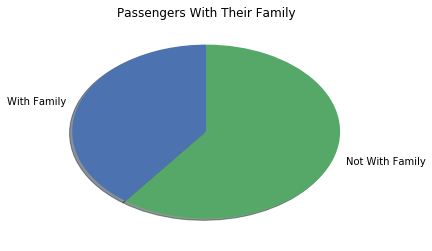

In [852]:
# Family:     those with siblings or spouses and those with parents or children
# No family:  difference between all and those with family

sibsp = titanic_df[titanic_df['SibSp'] > 0][['PassengerId', 'SibSp', 'Parch', 'Survived']]
parch = titanic_df[titanic_df['Parch'] > 0][['PassengerId', 'SibSp', 'Parch', 'Survived']]
family = pd.concat([sibsp, parch]).drop_duplicates()
nofamily = titanic_df[titanic_df['SibSp'] + titanic_df['Parch'] == 0][['PassengerId', 'SibSp', 'Parch', 'Survived']]
num_sibsp = len(sibsp)
num_parch = len(parch)
num_family = len(family)
num_nofamily = len(nofamily)

print("Number of passengers with siblings or spouses:", num_sibsp, "({:.0%})".format(num_sibsp/num_passengers))
print("Number of passengers with parents or children:", num_parch, "({:.0%})".format(num_parch/num_passengers))
print()
print("Number of passengers with family (siblings, spouses, parents, or children):", num_family, "({:.0%})".format(num_family/num_passengers))
print("Number of passengers with no family:", num_nofamily, "({:.0%})".format(num_nofamily/num_passengers))

# Pie chart
plt.pie([num_family, num_nofamily], labels=['With Family', 'Not With Family'],shadow=True, startangle=90)
plt.title('Passengers With Their Family')
print()

## Survival of those with their family versus of those without their family on the Titanic

Number of survivors who had family on the Titanic: 179
Number of survivors who did not have family on the Titanic: 163

There is a significant difference between the number of survivors who had family aboard
and the number of survivors who did not have any family aboard (p-value = 2e-09).


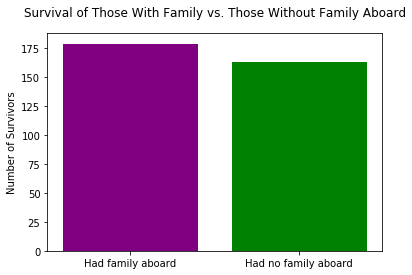

In [853]:
family_survivors = family[family['Survived'] == 1]
nofamily_survivors = nofamily[nofamily['Survived'] == 1]
num_family_survivors = len(family_survivors)
num_nofamily_survivors = len(nofamily_survivors)
print("Number of survivors who had family on the Titanic:", num_family_survivors)
print("Number of survivors who did not have family on the Titanic:", num_nofamily_survivors)

# Bar chart
category_labels = ["Had family aboard", "Had no family aboard"]
plt.bar(category_labels, [num_family_survivors, num_nofamily_survivors], color = ['purple', 'green'])
plt.title("Survival of Those With Family vs. Those Without Family Aboard", y = 1.05)
plt.ylabel('Number of Survivors')
print()

# Check if difference is significant
from scipy import stats
np.random.seed(7654567) # fix seed to get the same result (?)
tscore, pvalue = stats.ttest_ind(family['Survived'], nofamily['Survived'], equal_var=False)
if pvalue < 0.01:
    result = 'a'
else:
    result = 'no'
print("There is {} significant difference between the number of survivors who had family aboard\n\
and the number of survivors who did not have any family aboard (p-value = {:.0}).".format(result, pvalue))